In [3]:
#importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Reading data and making it ready for analysis**

In [4]:
#loading the data
data = pd.read_csv(r"C:\Users\lenovo\Downloads\Global Terrorism - START data\globalterrorismdb_0718dist.csv")
data.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
#renaming the data to make it user friendly
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [6]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
data.isnull==True


False

**Since there are no null values in the Dataset, we can represent it visually**

In [11]:
data['Casualities'] = data['kill'] + data['Wound']
data['Casualities'] =data['Casualities'].fillna(0)

**Graph to depict the rising attacks each year**

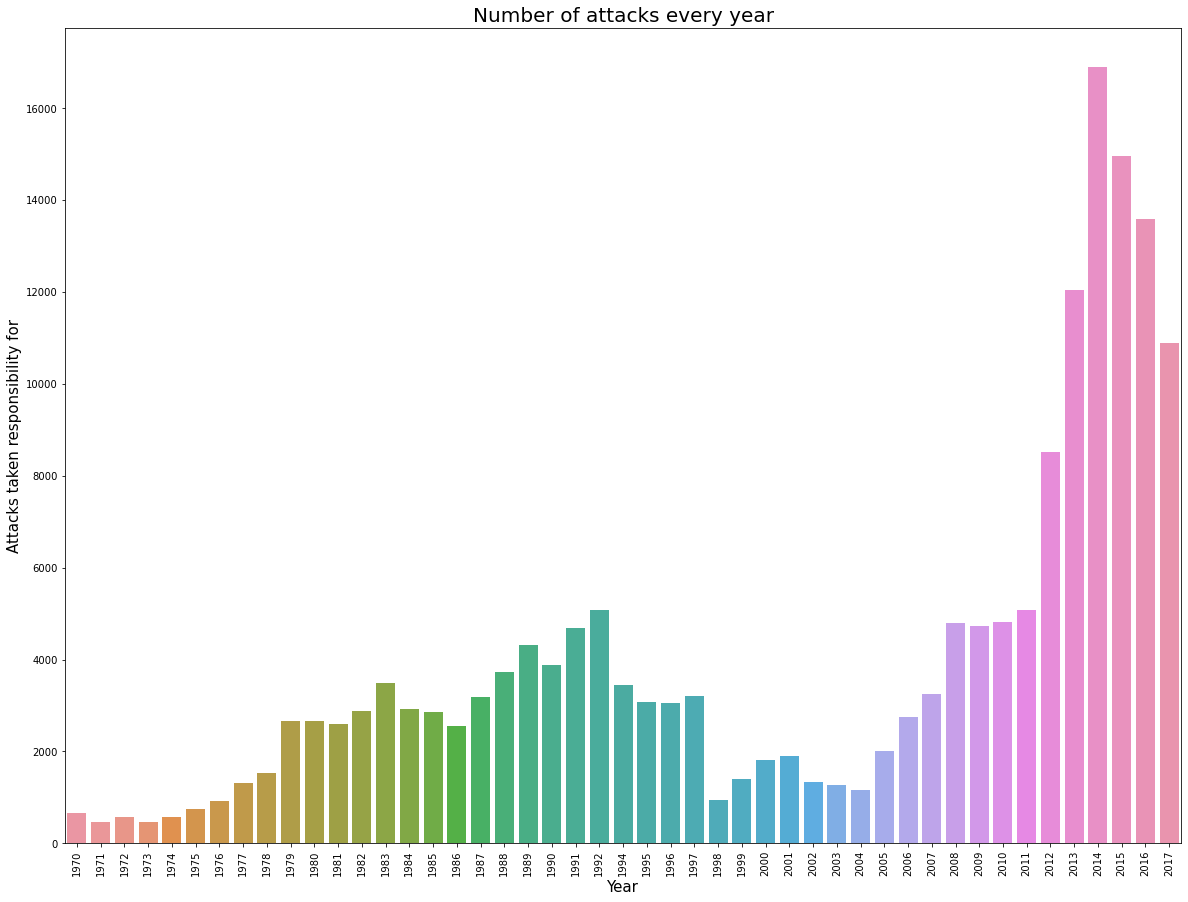

In [29]:

year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (20,15))
sns.barplot(x = year,
           y = years_count,
          )
plt.xticks(rotation = 90)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Attacks taken responsibility for',fontsize=15)
plt.title('Number of attacks every year',fontsize=20)
plt.show()

**Graph to depict the various regions targetted by terrorists**

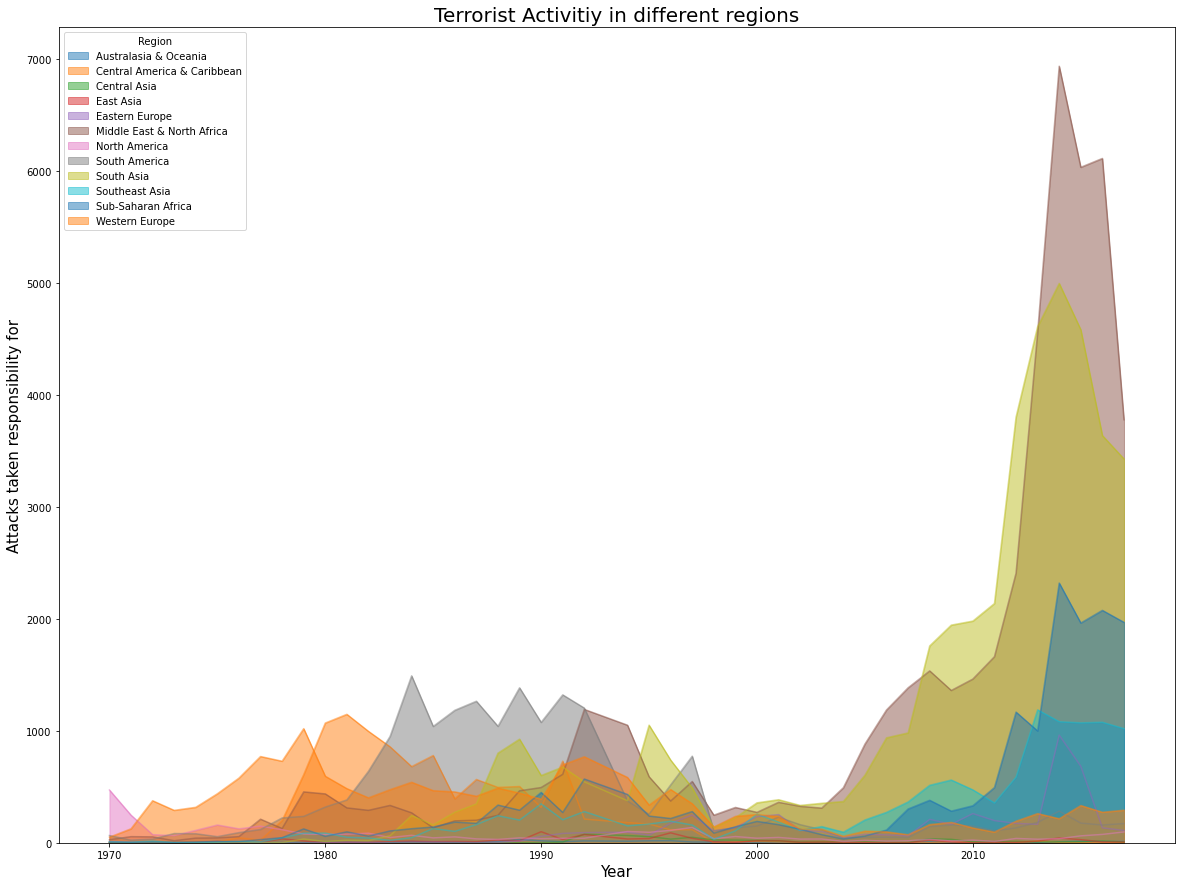

In [30]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(20,15))
plt.title('Terrorist Activitiy in different regions',fontsize=20)
plt.ylabel('Attacks taken responsibility for',fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.show()

In [27]:
attack = data.Country.value_counts()
attack

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
Andorra                    1
St. Lucia                  1
International              1
North Korea                1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

In [28]:
data.Group.value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Yokoku Seiwa-Kai                                        1
Roque Dalton Commando                                   1
Cell for Internationalism                               1
Iraqi Sunni Extremists                                  1
National Liberation Front of Chad                       1
Name: Group, Length: 3537, dtype: int64

**Graphical representation of the worst affected countries**

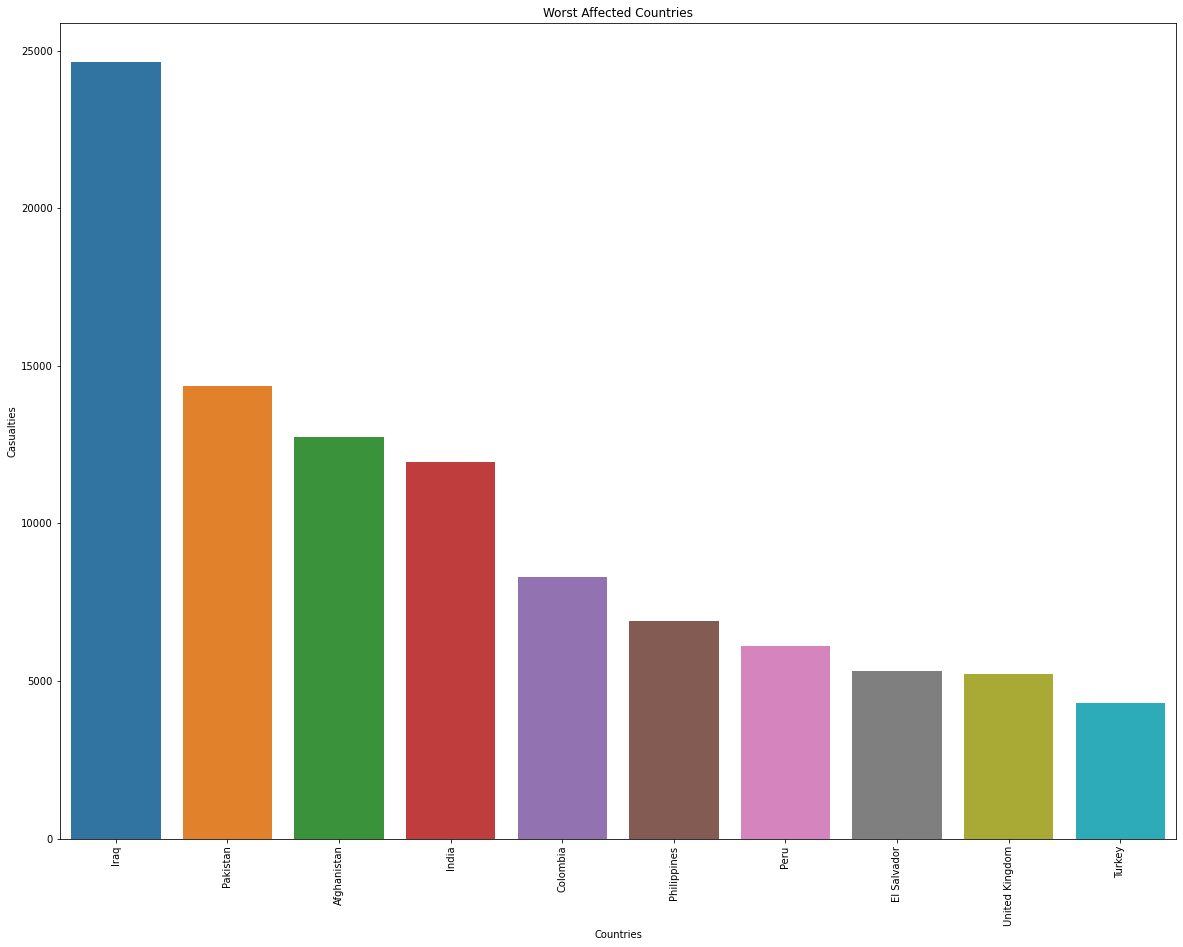

In [31]:
plt.subplots(figsize=(20,15))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values)
plt.title('Worst Affected Countries')
plt.xlabel('Countries')
plt.ylabel('Casualties')
plt.xticks(rotation = 90)
plt.show()

**Tabulating insights from the data**

In [32]:

df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [37]:
Deaths = data.loc[:,'kill']
print('Casualties due terror attacks:', int(sum(kill.dropna())))

Casualties due terror attacks: 411868


In [34]:
Attack_type = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
Attack_type

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [38]:
Country_deaths = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
Country_deaths

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


### Inference:
Country with the most attacks: Iraq

Group with the most attacks: Taliban

Most Attack Types: Bombing/Explosion

Region with the most attacks: Middle East & North Africa



###  The above is the solution to the problem. That is, the hotzone of terrorism in Iraq and the Middle-East